In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
data = pd.read_csv('Regression_Dataset.csv')
data_train, data_test = train_test_split(data, test_size = 0.2)

In [4]:
data_test

,x,y
63,61,59.225745
284,59,60.917927
155,22,18.847982
92,63,58.614669
259,36,38.677808
231,5,5.634031
178,46,49.835382
38,28,27.424972
126,78,74.499360
184,37,34.124732


In [5]:
data_train

,x,y
96,21,16.890852
211,45,41.903689
115,24,25.634763
98,73,70.349698
172,54,53.320058
...,...,...
240,92,95.395800
137,59,59.105990
62,76,75.597013
253,60,60.111350


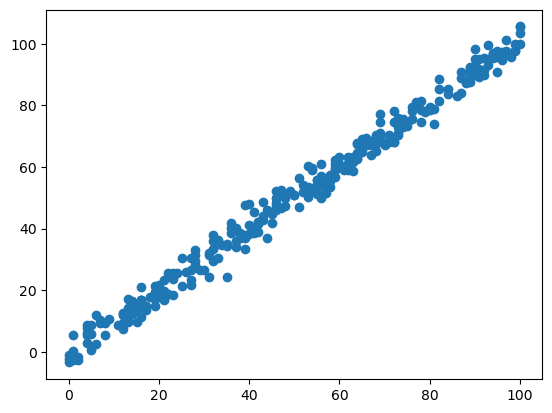

In [6]:
plt.scatter(data.x, data.y)
plt.show()

\begin{equation*}
E = \frac{1}{n} \sum_{i=0}^n y_i - mx_i + b
\end{equation*}
\begin{equation*}
\frac{\partial E}{\partial m} = -\frac{2}{n} \sum_{i=0}^n x_i ( y_i - mx_i + b)
\end{equation*}
\begin{equation*}
\frac{\partial E}{\partial b} = -\frac{2}{n} \sum_{i=0}^n  y_i - mx_i + b
\end{equation*}

In [7]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        m_gradient += -(2/n)*x*(y - (m_now * x + b_now))
        b_gradient += -(2/n)*(y - (m_now * x + b_now))
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m,b

In [16]:
m_train = 0
b_train = 0
L_train = 0.0001
epochs = 1000

for i in range(epochs):
    m_train,b_train = gradient_descent(m_train, b_train, data_train, L_train)
    
print(m_train, b_train)

1.011688170880229 0.020840077288695993


In [ ]:
plt.scatter(data_train.x, data_train.y, color="black")
plt.plot(list(range(0, 120)), [m_train*x+b_train for x in range(0, 120)], color = 'red')
plt.show()

In [10]:
m_test = 0
b_test = 0
L_test = 0.0001
epochs = 1000

for i in range(epochs):
    m_test,b_test = gradient_descent(m_test, b_test, data_test, L_test)
    
print(m_test, b_test)

1.0032821147418907 -0.009413613136789036


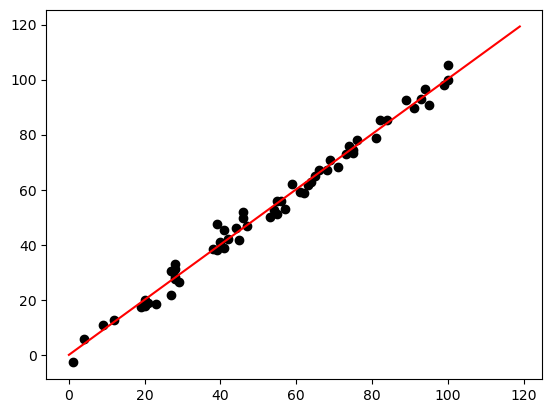

In [104]:
plt.scatter(data_test.x, data_test.y, color="black")
plt.plot(list(range(0, 120)), [m_test*x+b_test for x in range(0, 120)], color = 'red')
plt.show()

In [11]:
def variance(num1, num2):
    return (num1 - num2)**2

In [12]:
#The error measured in variance between the training and test () set is
m_variance = variance(m_train, m_test)
b_variance = variance(b_train, b_test)

print(m_variance, b_variance)

1.0065750017609603 8.861611228912711e-05


# To see how this model performs on a lower train/test ratio

In [13]:
data_train, data_test = train_test_split(data, test_size = 0.6)
print(data_train)
print(data_test)

      x          y
239  28  28.156685
294   8   5.405221
107  90  98.132580
265  20  19.878465
31   31  31.435248
..   ..        ...
23   27  21.713803
26   79  78.310565
175  32  37.801828
215  55  51.800359
33   80  78.610424

[120 rows x 2 columns]
      x          y
79   84  83.688205
36   53  53.622352
212  59  62.226357
271   8   9.391417
207  77  79.314255
..   ..        ...
286  16  16.749239
227  87  88.803069
196   4   8.655714
291  11   8.673336
197  72  69.398585

[180 rows x 2 columns]


In [17]:
m_test = 0
b_test = 0
L_test = 0.0001
epochs = 1000

for i in range(epochs):
    m_test,b_test = gradient_descent(m_test, b_test, data_test, L_test)
    
print(m_test, b_test)

1.0048027798875008 -0.025958073978455933


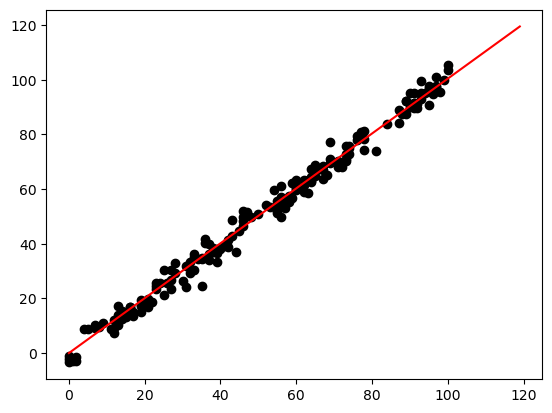

In [18]:
plt.scatter(data_test.x, data_test.y, color="black")
plt.plot(list(range(0, 120)), [m_test*x+b_test for x in range(0, 120)], color = 'red')
plt.show()

In [19]:
m_train = 0
b_train = 0
L_train = 0.0001
epochs = 1000

for i in range(epochs):
    m_train,b_train = gradient_descent(m_train, b_train, data_train, L_train)
    
print(m_train, b_train)

1.011688170880229 0.020840077288695993


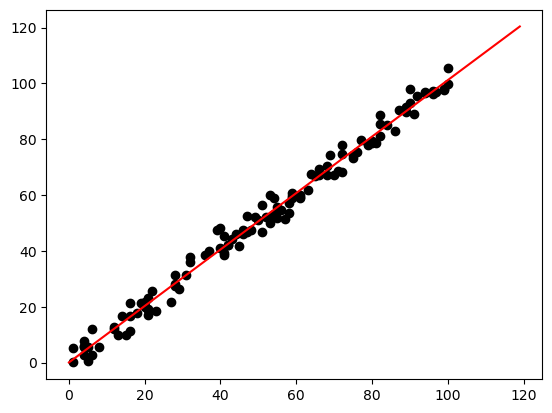

In [20]:
plt.scatter(data_train.x, data_train.y, color="black")
plt.plot(list(range(0, 120)), [m_train*x+b_train for x in range(0, 120)], color = 'red')
plt.show()

In [21]:
m_variance = variance(m_train, m_test)
b_variance = variance(b_train, b_test)

print(m_variance, b_variance)

4.740860912274296e-05 0.002190066962023233


# Lets try this regression on an actual real world dataset

In [62]:
fish_data = pd.read_csv('Fish.csv')
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [63]:
fish_data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [64]:
fish_data = fish_data.rename(columns = {'Length1':'LenVert', 'Length2':'LenDiag', 'Length3':'LenCross'})

In [65]:
fish_data.isnull().sum()

Species     0
Weight      0
LenVert     0
LenDiag     0
LenCross    0
Height      0
Width       0
dtype: int64

In [70]:
species_data = fish_data.Species.value_counts()
species_data = pd.DataFrame(species_data)
species_data.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


## Let us try finding if there is a linear relation between Diagonal length and Vertical Length of fish

In [67]:
data_weight = fish_data.iloc[:, [2, 3]]
data_weight = data_weight.rename(columns={'LenDiag':'y'})
data_weight = data_weight.rename(columns={'LenVert':'x'})
data_weight

,x,y
0,23.2,25.4
1,24.0,26.3
2,23.9,26.5
3,26.3,29.0
4,26.5,29.0
...,...,...
154,11.5,12.2
155,11.7,12.4
156,12.1,13.0
157,13.2,14.3


In [68]:
m_weight = 0
b_weight = 0
L = 0.0001
epochs = 1000

for i in range(epochs):
    m_weight,b_weight = gradient_descent(m_weight, b_weight, data_weight, L)
    
print(m_weight, b_weight)

1.0798107654579372 0.0423326322124162


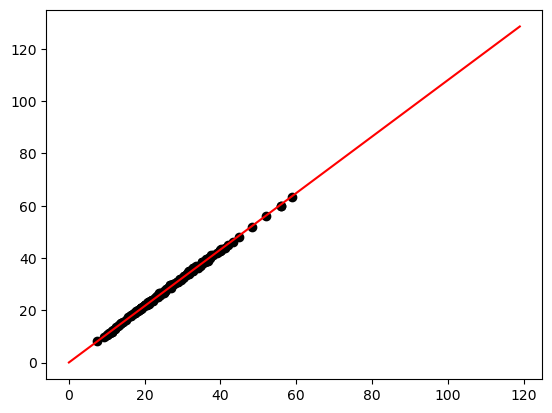

In [69]:
plt.scatter(data_weight.x, data_weight.y, color="black")
plt.plot(list(range(0, 120)), [m_weight*x+b_weight for x in range(0, 120)], color = 'red')
plt.show()